# ДЗ к 4 семинару

### Задача 1

Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

1.1. Скачать данные по ссылке https://www.kaggle.com/datasets/ionaskel/laptop-prices

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


1.2 Изучите стоимости недвижимости

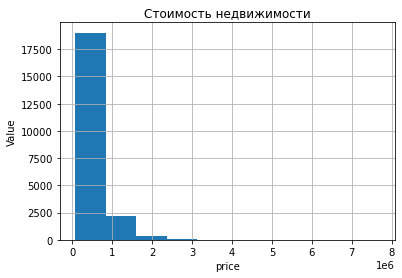

In [2]:
plt.hist(df['price'])
plt.xlabel('price')
plt.ylabel('Value')
plt.title('Стоимость недвижимости')
plt.grid();

1.3 Изучите распределение квадратуры жилой

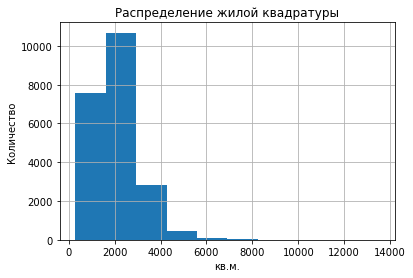

In [3]:
plt.hist(df['sqft_living'])
plt.xlabel('кв.м.')
plt.ylabel('Количество')
plt.title('Распределение жилой квадратуры')
plt.grid();

1.4 Изучите распределение года постройки

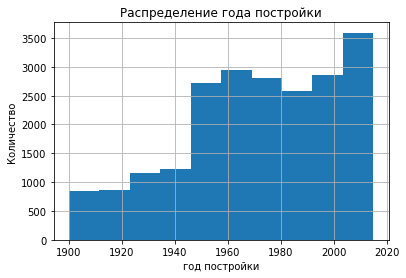

In [4]:
plt.hist(df['yr_built'])
plt.xlabel('год постройки')
plt.ylabel('Количество')
plt.title('Распределение года постройки')
plt.grid();

### Задача 2
2.1 Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы

Вывод - почти все дома не имеют вида на набережную (99.2% не имеют)

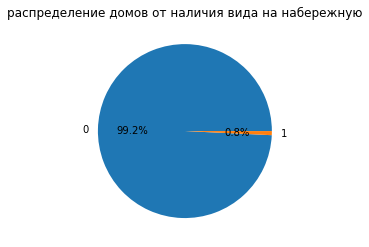

In [5]:
plt.pie(df['waterfront'].value_counts().values, autopct ='%1.1f%%', labels = df['waterfront'].value_counts().index);
plt.title('распределение домов от наличия вида на набережную');

2.2 Изучите распределение этажей домов

Вывод - больше всего домой имеет 1 этаж

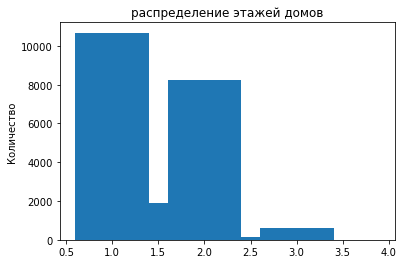

In [6]:
floors_rasp = df['floors'].value_counts()
index_values = floors_rasp.values
index_names = floors_rasp.index
floors_rasp
plt.bar(index_names, index_values)
plt.title('распределение этажей домов')
plt.ylabel('Количество')
plt.xticks();

2.2 Изучите распределение состояния домов

Вывод - Больше всего домов имеет состояние 7- средний уровень конструкции и дизайна

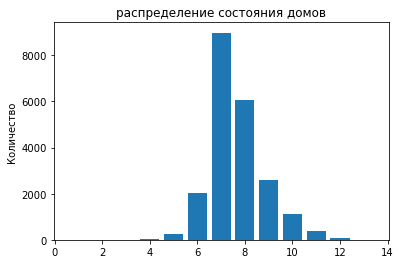

In [7]:
grade_rasp = df['grade'].value_counts()
index_values1 = grade_rasp.values
index_names1 = grade_rasp.index
grade_rasp
plt.bar(index_names1, index_values1)
plt.title('распределение состояния домов')
plt.ylabel('Количество')
plt.xticks();

## Задача 3
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

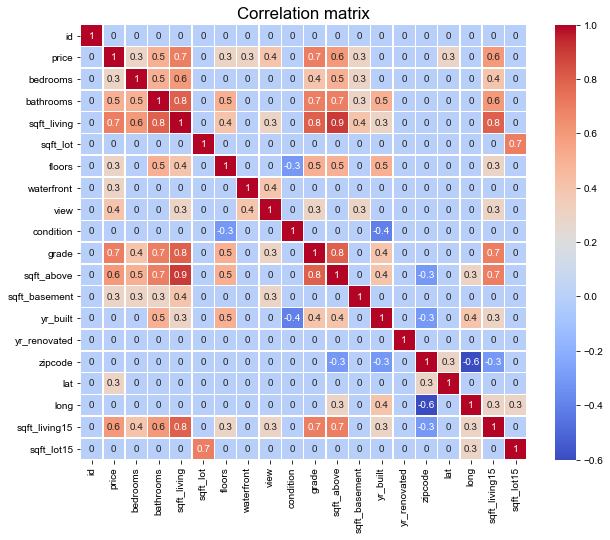

In [8]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1) #округление(тот параметр, который хотим округлять, 1 -знак после запятой)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0 #берем значения по модулю (если попадаются отрицательные значения)
corr_matrix

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
sns.set(font_scale=1.4)
plt.title('Correlation matrix');

На стоимость недвижимости влияют:
1) sqft_living - Кв. метры жилые
2) grade - состояние дома
3) sqft_above - чердак
4) sqft_living15 - Кв. метры жилой площади у 15 соседей
5) bathrooms - Кол-во ванных комнат

In [ ]:
#взимосвязь стоимости и sqft_living - Кв. метры жилые
plt.figure(figsize = (8, 6))
sns.boxplot(x = df['price'], y = df['sqft_living'], whis = 1.5)
plt.title('взимосвязь стоимости и жилых кв метров');

In [ ]:
#взимосвязь стоимости и состояния дома
plt.figure(figsize = (8, 6))
sns.boxplot(x = df['price'], y = df['grade'], whis = 10)
plt.title('взимосвязь стоимости и и состояния дома');